In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")
Pkg.add(url="https://github.com/madeleineudell/LowRankModels.jl")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


   Updating git-repo `https://github.com/madeleineudell/LowRankModels.jl`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots
using LowRankModels

In [3]:
include("../demos/proxgrad.jl")

proxgrad_const

In [4]:
df = CSV.read("glrm.csv")

,age,sex,race4,race7,stweight,bmi,stheight,qnobese,qnowt
,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Bool,Bool
1,1.0,2.0,4.0,0.282162,-2.05651,0.823437,0,0,0
2,1.0,2.0,4.0,2.0,-0.689948,-2.08214,0,0,0
3,1.0,2.0,3.0,4.0,0.803,-3.84857,0,1,1
4,1.0,2.0,4.0,-5.89099,3.21368,-1.04064,1,0,1
5,2.0,2.0,2.0,3.0,0.665567,-0.934,0,1,0
6,2.0,2.0,1.0,6.0,3.04773,0.780799,0,1,0
7,2.0,2.0,2.0,3.0,-6.51447,-0.186644,1,0,0
8,3.0,2.0,3.0,4.0,-1.96121,-0.63272,0,1,0
9,3.0,2.0,1.0,6.0,-2.17538,-1.93969,0,1,1


In [5]:
df = df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = df[:, :q41]
data = df[:, filter(col -> (col != :q41), names(df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:]

Size of dataset: 199642


39929×1 Array{Int64,2}:
 2
 1
 4
 1
 1
 3
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 6
 1
 1
 1
 3
 1
 1
 2
 1
 2
 2

In [6]:
train_y1 = train_y[:, 1]
test_y1 = test_y[:, 1]
val_y1 = val_y[:, 1]

39928-element Array{Int64,1}:
 2
 1
 1
 2
 3
 3
 1
 3
 1
 1
 1
 3
 2
 ⋮
 1
 1
 3
 1
 1
 3
 1
 2
 2
 1
 1
 2

In [40]:
Xtrain = hcat(Array(train_x), ones(ntrain))
Xval = hcat(Array(val_x), ones(nval))
loss = OrdinalHingeLoss()
mul!(loss, 1/n)
w = proxgrad(loss, ZeroReg(), Xtrain, train_y1, stepsize=1, maxiters=200)

257-element Array{Float64,1}:
  0.009085606497349021
  0.0023451401837413983
 -0.0019137500211455034
  0.012632297463451599
  0.0014711480054404858
 -0.007669878480604341
  0.0005047071367122145
 -3.3896123279417655e-5
  0.00015893928647904893
 -0.0014509370210176176
 -0.0010810243891252824
 -0.0019796299634157618
 -0.002371121749337562
  ⋮
  0.007651251893232635
 -0.0007887531767801861
  0.0011134041261983926
 -0.0029155997829865524
  0.0010605115970086449
  0.008255651639872857
  0.0001822842967035983
  0.0060353834144368365
  0.002096626496585126
  0.00199486964478917
  0.0013389029839975897
  0.0005826151467376576

In [41]:
train_pred = impute(loss, Xtrain*w)
val_pred = impute(loss, Xval*w)

39928×1 Array{Number,2}:
 1
 1
 2
 2
 2
 2
 3
 2
 2
 1
 1
 1
 2
 ⋮
 2
 2
 3
 1
 1
 2
 2
 2
 2
 1
 1
 3

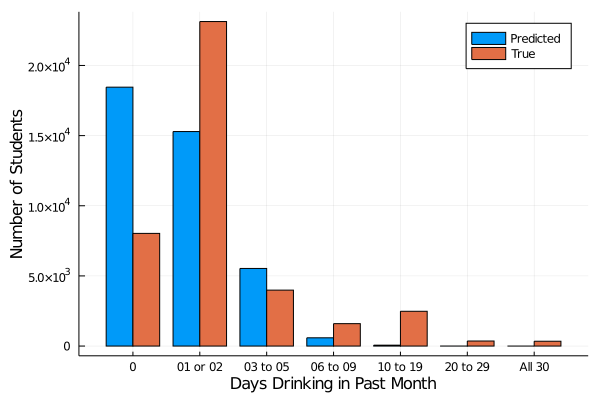

In [42]:
pred_counts=[(count(x->x==i,val_pred)) for i in [1,2,3,4,5,6,7]]

u=unique(val_y1)
y_counts=[(count(x->x==i,val_y1)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [47]:
true_pred = zeros(7)
false_pred = zeros(7)
for i in val_y
    for j in val_pred
        if i == j
            if i == 1
                true_pred[1] += 1
            elseif i == 2
                true_pred[2]+= 1
            elseif i == 3
                true_pred[3]+= 1
            elseif i == 4
                true_pred[4] += 1
            elseif i == 5
                true_pred[5] += 1
            elseif i == 6
                true_pred[6] += 1
            elseif i == 7
                true_pred[7] += 1
            end
        else
            if j == 1
                false_pred[1] += 1
            elseif j == 2
                false_pred[2]+= 1
            elseif j == 3
                false_pred[3] += 1
            elseif j == 4
                false_pred[4] += 1
            elseif j == 5
                false_pred[5] += 1
            elseif j == 6
                false_pred[6] += 1
            elseif j == 7
                false_pred[7] += 1    
            end
        end
    end
end

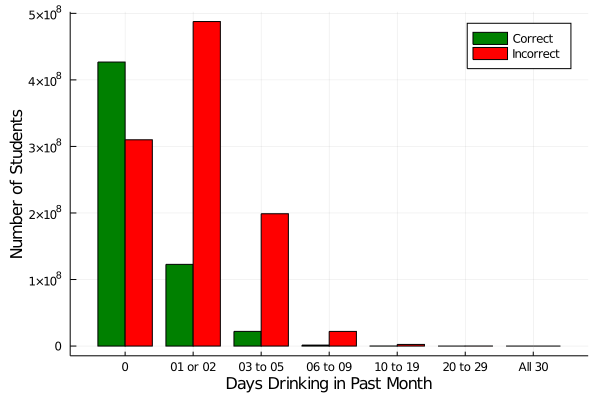

In [48]:
all = vcat(true_pred,false_pred)
all = reshape(all, (14, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [49]:
sum(true_pred)/sum(all)

0.35955605747026675

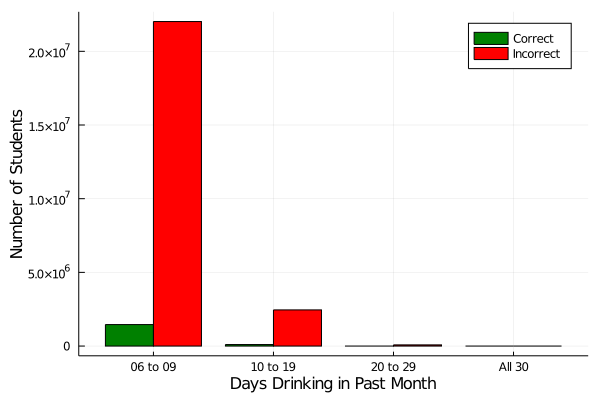

In [50]:
all = vcat(true_pred[4:end],false_pred[4:end])
all = reshape(all, (8, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 4)
group = repeat(["06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [26]:
all = vcat(true_pred,false_pred)
all = reshape(all, (14, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:red :green])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

14×1 Array{Float64,2}:
      4.2681789e8
      1.22785959e8
      2.2056084e7
      1.457652e6
 102208.0
    720.0
      0.0
      4.9671675e8
      1.97875809e8
      1.37136852e8
      9.752386e7
      6.3662808e7
      1.437336e7
      1.3735232e7

In [51]:
Xtrain = hcat(Array(train_x), ones(ntrain))
Xval = hcat(Array(val_x), ones(nval))
loss = BvSLoss(8)
mul!(loss, 1/n)
w = proxgrad(loss, ZeroReg(), Xtrain, train_y1, stepsize=1, maxiters=200)

257×7 Array{Float64,2}:
 -0.00856781   -0.0153176   -0.0194158    …  -0.0305874   -0.0343098
 -0.0051084    -0.00449386  -0.00493052      -0.00825423  -0.00992697
 -0.0118292    -0.0151435   -0.0142666       -0.0117751   -0.0135433
 -0.00252681   -0.00924651  -0.0160463       -0.026589    -0.0293588
  0.000312128   0.00161919   0.000337284     -0.0254988   -0.10225
 -0.0110054    -0.0160158   -0.0156427    …  -0.0132408   -0.0372684
 -0.00155308   -0.00193689  -0.00220569      -0.0027509   -0.00259278
 -0.00266893   -0.00347238  -0.00362134      -0.00327747  -0.0038865
 -0.00251154   -0.00321455  -0.00341669      -0.00335245  -0.00394974
 -0.00432      -0.00489586  -0.00475733      -0.00358536  -0.00382052
 -0.00427434   -0.00438166  -0.0040376    …  -0.00356354  -0.00387586
 -0.00511726   -0.00469284  -0.0042808       -0.00350575  -0.00385816
 -0.00638023   -0.00568346  -0.00500481      -0.00377217  -0.00395209
  ⋮                                       ⋱   ⋮           
 -0.00229453   

In [52]:
train_pred = impute(loss, Xtrain*w)
val_pred = impute(loss, Xval*w)

39928×1 Array{Number,2}:
 1
 1
 1
 1
 2
 1
 2
 1
 1
 1
 1
 1
 2
 ⋮
 1
 1
 2
 1
 1
 2
 1
 2
 2
 1
 1
 2

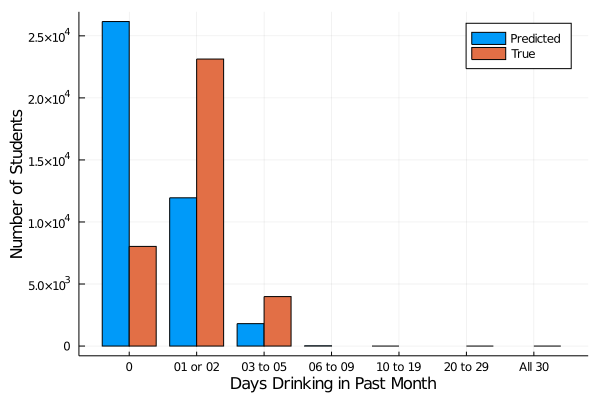

In [53]:
pred_counts=[(count(x->x==i,val_pred)) for i in [1,2,3,4,5,6,7]]

u=unique(val_y1)
y_counts=[(count(x->x==i,val_y1)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [54]:
true_pred = zeros(7)
false_pred = zeros(7)
for i in val_y
    for j in val_pred
        if i == j
            if i == 1
                true_pred[1] += 1
            elseif i == 2
                true_pred[2]+= 1
            elseif i == 3
                true_pred[3]+= 1
            elseif i == 4
                true_pred[4] += 1
            elseif i == 5
                true_pred[5] += 1
            elseif i == 6
                true_pred[6] += 1
            elseif i == 7
                true_pred[7] += 1
            end
        else
            if j == 1
                false_pred[1] += 1
            elseif j == 2
                false_pred[2]+= 1
            elseif j == 3
                false_pred[3] += 1
            elseif j == 4
                false_pred[4] += 1
            elseif j == 5
                false_pred[5] += 1
            elseif j == 6
                false_pred[6] += 1
            elseif j == 7
                false_pred[7] += 1    
            end
        end
    end
end

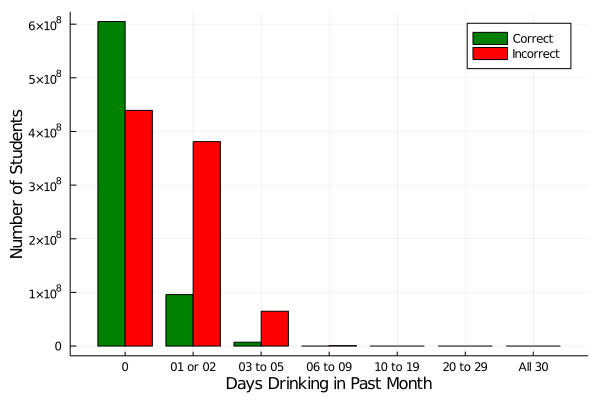

In [55]:
all = vcat(true_pred,false_pred)
all = reshape(all, (14, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 7)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

In [56]:
sum(true_pred)/sum(all)

0.4441598212787827

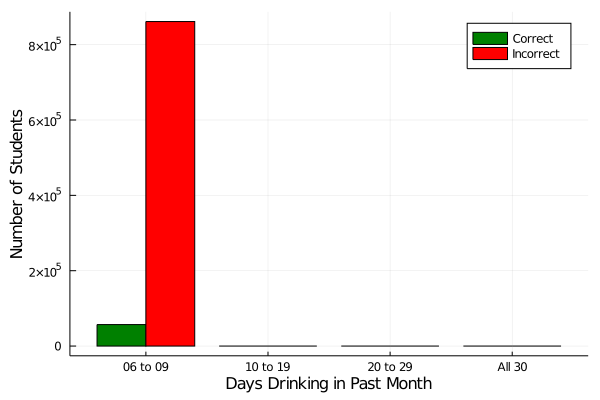

In [57]:
all = vcat(true_pred[4:end],false_pred[4:end])
all = reshape(all, (8, 1))
ctg = repeat(["Correct", "Incorrect"], inner = 4)
group = repeat(["06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7, c = [:green :red])
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")

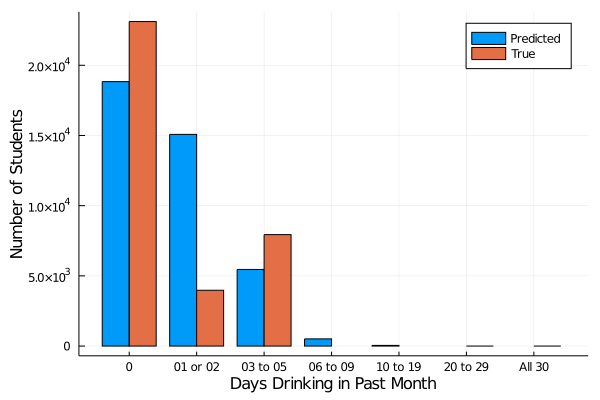

In [92]:
k_all = [10, 25, 50]
U, S, V = svd(Xtrain)


#for k in k_all
    #println(k)

Uk = U[:, 1:10];
Sk = S[1:10];
Vk = V[:, 1:10];

train_pca =  Xtrain * Vk
val_pca = Xval * Vk

# write your code for model fitting and prediction
w_pca = proxgrad(1/n*OrdinalHingeLoss(), ZeroReg(), train_pca, train_y1, stepsize=1, maxiters=200)

train_pred = impute(loss, train_pca*w_pca)
val_pred = impute(loss, val_pca*w_pca)

pred_counts=[(count(x->x==i,val_pred)) for i in [1,2,3,4,5,6,7]]

u=unique(val_y1)
y_counts=[(count(x->x==i,val_y1)) for i in u]

all = vcat(pred_counts,y_counts)
all = reshape(all, (14, 1))
ctg = repeat(["Predicted", "True"], inner = 5)
group = repeat(["0", "01 or 02", "03 to 05", "06 to 09", "10 to 19", "20 to 29", "All 30"], outer = 2)

groupedbar(group, all, group = ctg, bars = :dodge, barwidth = 0.7)
xlabel!("Days Drinking in Past Month")
ylabel!("Number of Students")
    
#end

In [93]:
train_pca

119785×10 Array{Float64,2}:
   -9.6185   -26.0493      6.55136  …   1.07146    0.699321     1.24803
   -5.55023  -24.4176      1.70543      2.41119    1.26908      2.90903
  -68.6186     0.0482968  -4.91446     -2.0189     1.30333     -0.671199
   -3.27143  -25.2226      4.23759     -1.22101   -0.529891     3.752
  -88.789      5.24598    -6.99527     -0.935414   2.5535      -2.7153
  -71.5899     0.338276   -2.67043  …  -0.708143  -0.661039    -0.240596
   -8.03928  -24.058      -3.07816      3.3073     1.00556     -1.80908
  -77.2897     0.678293   -3.87851     -1.61962   -1.11753     -1.38535
  -55.0028   -11.685       3.69676      1.56197    0.814454     0.416583
  -12.5932   -20.9688     -4.12849     -1.92207   -0.0306348   -7.25888
   -9.51981  -22.1471     -3.56877  …   0.272073  -1.00233      2.02938
  -55.5876    -5.77102    -2.66578     -2.00876    0.883588    -4.0962
  -63.2216   -11.5778      7.81369     -3.19648   -3.35778     -3.16475
    ⋮                               ⋱

In [89]:
Xtrain[1,:]

257-element Array{Float64,1}:
  6.0
  1.0
  1.0
  6.0
  1.8099051915431705
 -2.386241993618884
  1.0
  1.0
  1.0
  1.0
  0.0
  1.0
  0.0
  ⋮
  6.0
  2.0
  2.0
  2.0
  3.0
  8.0
  1.0
  1.0
  1.0
  4.0
  4.0
  1.0